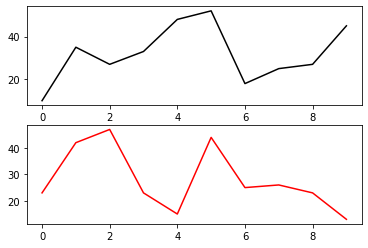

In [10]:
import matplotlib.pyplot as plt
import numpy as np
lst_data=[10,35,27,33,48,52,18,25,27,45]
lst_data2=list(np.random.randint(10, 50,size=10))




### 여러가지 차트 한 화면에 출력 (두개의 행으로 출력)

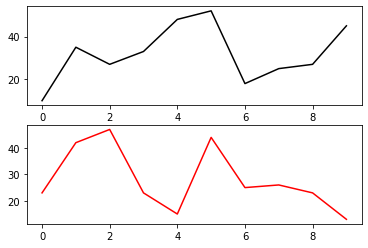

In [13]:
fig=plt.figure()

ax1=fig.add_subplot(2,1,1)  # add_subplot(행 개수, 열 개수, 출력 위치)
ax2=fig.add_subplot(2,1,2)


ax1.plot(lst_data, 'k')
ax2.plot(lst_data2, "r")
plt.show()


### 여러가지 차트 한 화면에 출력(병렬)

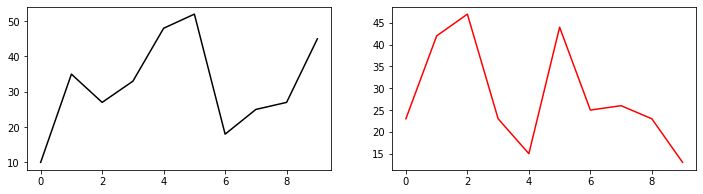

In [14]:
fig=plt.figure(figsize=(12,3))

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)


ax1.plot(lst_data, 'k')
ax2.plot(lst_data2, "r")
plt.show()


### 여러가지 차트 한 화면에 출력 (행/열 여러개 출력하기)

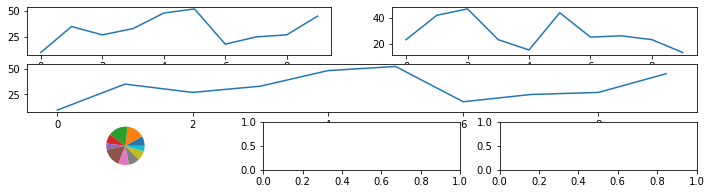

In [27]:
fig=plt.figure(figsize=(12,3))  #차트 화면 사이즈 설정

ax1=fig.add_subplot(3,2,1)     
ax2=fig.add_subplot(3,2,2)
ax3=fig.add_subplot(3,1,2)
ax4=fig.add_subplot(3,3,7)
ax5=fig.add_subplot(3,3,8)
ax6=fig.add_subplot(3,3,9)


ax1.plot(lst_data)
ax2.plot(lst_data2)
ax3.plot(lst_data)
ax4.pie(lst_data2)
plt.show()


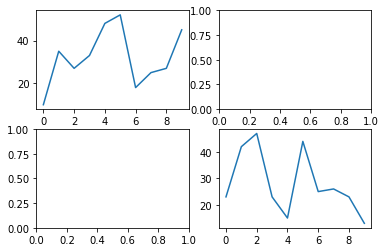

In [26]:
fig, ax_lst=plt.subplots(2,2) 


ax_lst[0][0].plot(lst_data)
ax_lst[1][1].plot(lst_data2)

plt.show()

출력 조건 입력(년도별:1, 자치구별:2): 2
조회 자치구 입력: 노원구


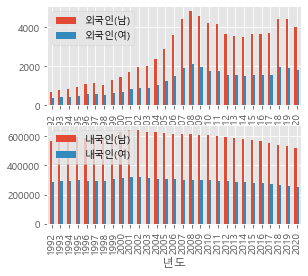

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

df1=pd.read_csv('./data/서울시 인구현황_구.txt', sep='\t', header=1)
df1=df1.iloc[:, [0,1,6,7,9,10]]
df1.drop(0, inplace=True)
### 컬럼 이름 변경하기
col_name=['년도', '자치구', '내국인(남)', '내국인(여)','외국인(남)','외국인(여)']
for i in range(len(col_name)):
    df1.rename(columns={df1.columns[i]:col_name[i]}, inplace=True)
### 데이터 중 "…" 값 제거하기 / 1991년 데이터 삭제
df1=df1[df1['내국인(남)']!="…"]
### 콤마(,) 제거하기
df1['내국인(남)']=df1['내국인(남)'].str.replace(",","")
df1['내국인(여)']=df1['내국인(여)'].str.replace(",","")
df1['외국인(남)']=df1['외국인(남)'].str.replace(",","")
df1['외국인(여)']=df1['외국인(여)'].str.replace(",","")
### 숫자형 데이터 변경하기
df1=df1.astype({'내국인(남)':'int64','내국인(여)':'int64','외국인(남)':'int64','외국인(여)':'int64'})
#print(df1.dtypes)

fig=plt.figure(figsize=(12,3))

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,3)

cho=input('출력 조건 입력(년도별:1, 자치구별:2): ')
plt.style.use('ggplot')


if cho == "1":
    ### 년도별 조회(합계 제외)
    inYear=input('조회 년도 입력: ')
    df2 = df1[(df1['년도'] == inYear) & (df1['자치구'] != '합계')]  # 합계 제외
    df2['외국인']=df2['외국인(남)']+df2['외국인(여)']
    df2.plot(kind='bar', x='자치구', y=['외국인(남)', '외국인(여)'], figsize=(10, 4),ax=ax1)
    df2.plot(kind='bar', x='자치구', y=['외국인'], figsize=(10, 4), ax=ax2)

elif cho=="2":
    ### 자치구별 조회
    ingu = input('조회 자치구 입력: ')
    df2=df1[df1['자치구'] == ingu]
    df2.plot(kind='bar', x='년도', y=['외국인(남)', '외국인(여)'], figsize=(10, 4), ax=ax1)
    df2.plot(kind='bar', x='년도', y=['내국인(남)', '내국인(여)'], figsize=(10, 4),ax=ax2)
else:
    print('1과 2중 하나만 입력하세요.')
    exit()

    
    
plt.savefig('./data/Image_1.png')    
#fig.saverfig
plt.show()